# Decision Tree implementation

 
by Navya Pai

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel


# Read one dataset

In [10]:
#reading the loan approavl prediction dataset from kaggle-https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
dataNew = pd.read_csv("loan_approval_dataset.csv")
dataNew.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Let us now clean this data


In [11]:
#droping the columns which are not required
dataNew.columns = dataNew.columns.str.strip()
dataNew = dataNew.drop(['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','cibil_score','loan_id'],axis=1)

dataNew.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,loan_status
0,2,Graduate,No,9600000,29900000,12,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,Rejected
2,3,Graduate,No,9100000,29700000,20,Rejected
3,3,Graduate,No,8200000,30700000,8,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,Rejected


In [12]:
#renaming the columns to match with other dataset
dataNew.rename(columns={'no_of_dependents':'Dependents'}, inplace=True)
dataNew.columns = dataNew.columns.str.capitalize()
dataNew

,Dependents,Education,Self_employed,Income_annum,Loan_amount,Loan_term,Loan_status
0,2,Graduate,No,9600000,29900000,12,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,Rejected
2,3,Graduate,No,9100000,29700000,20,Rejected
3,3,Graduate,No,8200000,30700000,8,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,Rejected
...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,Approved
4266,2,Not Graduate,No,6500000,23900000,18,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,Approved


In [13]:
def modify_dependents(dependents):
    if dependents > 2:
        return '3+'
    else:
        return dependents


# Convert 'Dependents' column to numeric type
dataNew['Dependents'] = pd.to_numeric(dataNew['Dependents'], errors='coerce')

dataNew['Dependents'] = dataNew['Dependents'].apply(modify_dependents)

# Convert 'Dependents' column back to object type
dataNew['Dependents'] = dataNew['Dependents'].astype(str)

In [14]:
dataNew.rename(columns={'Income_annum':'Applicant_income'}, inplace=True)

In [15]:
dataNew

,Dependents,Education,Self_employed,Applicant_income,Loan_amount,Loan_term,Loan_status
0,2,Graduate,No,9600000,29900000,12,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,Rejected
2,3+,Graduate,No,9100000,29700000,20,Rejected
3,3+,Graduate,No,8200000,30700000,8,Rejected
4,3+,Not Graduate,Yes,9800000,24200000,20,Rejected
...,...,...,...,...,...,...,...
4264,3+,Graduate,Yes,1000000,2300000,12,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,Approved
4266,2,Not Graduate,No,6500000,23900000,18,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,Approved


In [16]:
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dependents        4269 non-null   object
 1   Education         4269 non-null   object
 2   Self_employed     4269 non-null   object
 3   Applicant_income  4269 non-null   int64 
 4   Loan_amount       4269 non-null   int64 
 5   Loan_term         4269 non-null   int64 
 6   Loan_status       4269 non-null   object
dtypes: int64(3), object(4)
memory usage: 233.6+ KB


# Read another dataset

In [17]:

#reading the loan dataset from kaggle- (https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?resource=download)
dataTrain = pd.read_csv("loan_train.csv")
dataTrain

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


Let us now clean this data 

In [18]:
#droping the columns which are not required
dataTrain = dataTrain.drop(['Gender','Married','Coapplicant_Income','Area','Credit_History'], axis=1)
dataTrain.head()

,Dependents,Education,Self_Employed,Applicant_Income,Loan_Amount,Term,Status
0,0,Graduate,No,584900,15000000,360.0,Y
1,1,Graduate,No,458300,12800000,360.0,N
2,0,Graduate,Yes,300000,6600000,360.0,Y
3,0,Not Graduate,No,258300,12000000,360.0,Y
4,0,Graduate,No,600000,14100000,360.0,Y


In [19]:
#renaming the column name to match other dataset
dataTrain.rename(columns={'Term':'Loan_term','Status':'Loan_status','Self_Employed':'Self_employed','Applicant_Income':'Applicant_income','Loan_Amount':'Loan_amount'}, inplace=True)
dataTrain.head()

,Dependents,Education,Self_employed,Applicant_income,Loan_amount,Loan_term,Loan_status
0,0,Graduate,No,584900,15000000,360.0,Y
1,1,Graduate,No,458300,12800000,360.0,N
2,0,Graduate,Yes,300000,6600000,360.0,Y
3,0,Not Graduate,No,258300,12000000,360.0,Y
4,0,Graduate,No,600000,14100000,360.0,Y


In [20]:
dataTrain['Loan_status']=dataTrain['Loan_status'].replace({'Y': 'Approved', 'N': 'Rejected'})
dataTrain

,Dependents,Education,Self_employed,Applicant_income,Loan_amount,Loan_term,Loan_status
0,0,Graduate,No,584900,15000000,360.0,Approved
1,1,Graduate,No,458300,12800000,360.0,Rejected
2,0,Graduate,Yes,300000,6600000,360.0,Approved
3,0,Not Graduate,No,258300,12000000,360.0,Approved
4,0,Graduate,No,600000,14100000,360.0,Approved
...,...,...,...,...,...,...,...
609,0,Graduate,No,290000,7100000,360.0,Approved
610,3+,Graduate,No,410600,4000000,180.0,Approved
611,1,Graduate,No,807200,25300000,360.0,Approved
612,2,Graduate,No,758300,18700000,360.0,Approved


In [21]:
#filling nan values
columnsObj = ['Dependents', 'Self_employed']

for col in columnsObj:
    dataTrain[col] = dataTrain[col].replace('nan', np.nan)
    
    dataTrain[col].fillna(dataTrain[col].mode()[0], inplace=True)


In [22]:
import numpy as np

# Convert loan term from days to months
dataTrain['Loan_term'] = dataTrain['Loan_term'] / 30

# Round up to the nearest whole month
dataTrain['Loan_term'] = np.ceil(dataTrain['Loan_term'])


In [23]:
#filling in nan values for loan term column
columnsNum = ['Loan_term']

for col in columnsNum:
    dataTrain[col].fillna(dataTrain[col].mean(), inplace=True)

In [24]:
#converting the value as int type
dataTrain['Loan_term'] = dataTrain['Loan_term'].astype(int)
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dependents        614 non-null    object
 1   Education         614 non-null    object
 2   Self_employed     614 non-null    object
 3   Applicant_income  614 non-null    int64 
 4   Loan_amount       614 non-null    int64 
 5   Loan_term         614 non-null    int64 
 6   Loan_status       614 non-null    object
dtypes: int64(3), object(4)
memory usage: 33.7+ KB


In [25]:
dataTrain

,Dependents,Education,Self_employed,Applicant_income,Loan_amount,Loan_term,Loan_status
0,0,Graduate,No,584900,15000000,12,Approved
1,1,Graduate,No,458300,12800000,12,Rejected
2,0,Graduate,Yes,300000,6600000,12,Approved
3,0,Not Graduate,No,258300,12000000,12,Approved
4,0,Graduate,No,600000,14100000,12,Approved
...,...,...,...,...,...,...,...
609,0,Graduate,No,290000,7100000,12,Approved
610,3+,Graduate,No,410600,4000000,6,Approved
611,1,Graduate,No,807200,25300000,12,Approved
612,2,Graduate,No,758300,18700000,12,Approved


# Combine two datasets

In [26]:
data = pd.concat([dataNew, dataTrain], ignore_index=True)

print("Shape of combined dataset:", data.shape)

#data.to_csv("DataSet.csv", index=False)
data

Shape of combined dataset: (4883, 7)


,Dependents,Education,Self_employed,Applicant_income,Loan_amount,Loan_term,Loan_status
0,2,Graduate,No,9600000,29900000,12,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,Rejected
2,3+,Graduate,No,9100000,29700000,20,Rejected
3,3+,Graduate,No,8200000,30700000,8,Rejected
4,3+,Not Graduate,Yes,9800000,24200000,20,Rejected
...,...,...,...,...,...,...,...
4878,0,Graduate,No,290000,7100000,12,Approved
4879,3+,Graduate,No,410600,4000000,6,Approved
4880,1,Graduate,No,807200,25300000,12,Approved
4881,2,Graduate,No,758300,18700000,12,Approved


In [27]:
#To remove extra space from the values of object column and checking for unique values present in the column
for column in data.columns: 
    if data[column].dtype == 'object':
        data[column] = data[column].str.strip().str.lower()

for column in data.columns:
    if data[column].dtype == 'object':
        print(column, ":", data[column].unique())

Dependents : ['2' '0' '3+' '1']
Education : ['graduate' 'not graduate']
Self_employed : ['no' 'yes']
Loan_status : ['approved' 'rejected']


# Visualization of Dataset

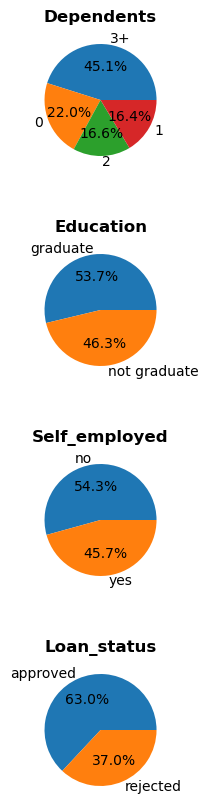

In [28]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))

columns = ['Dependents','Education', 'Self_employed', 'Loan_status']

# Plot pie charts
for i, column in enumerate(columns):
    data[column].value_counts().plot.pie(ax=ax[i], autopct='%1.1f%%')
    ax[i].set_title(column.capitalize(), fontweight='bold')
    ax[i].set_ylabel('')


plt.subplots_adjust(hspace=0.5)
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4883 entries, 0 to 4882
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dependents        4883 non-null   object
 1   Education         4883 non-null   object
 2   Self_employed     4883 non-null   object
 3   Applicant_income  4883 non-null   int64 
 4   Loan_amount       4883 non-null   int64 
 5   Loan_term         4883 non-null   int64 
 6   Loan_status       4883 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [30]:
data.isnull().sum()

Dependents          0
Education           0
Self_employed       0
Applicant_income    0
Loan_amount         0
Loan_term           0
Loan_status         0
dtype: int64

# Label encoding


In [31]:

#label encoding
le = LabelEncoder()
columns = ['Dependents', 'Education', 'Self_employed', 'Loan_status']
for col in columns:
    data[col] = data[col].astype(str)
    data[col] = le.fit_transform(data[col])


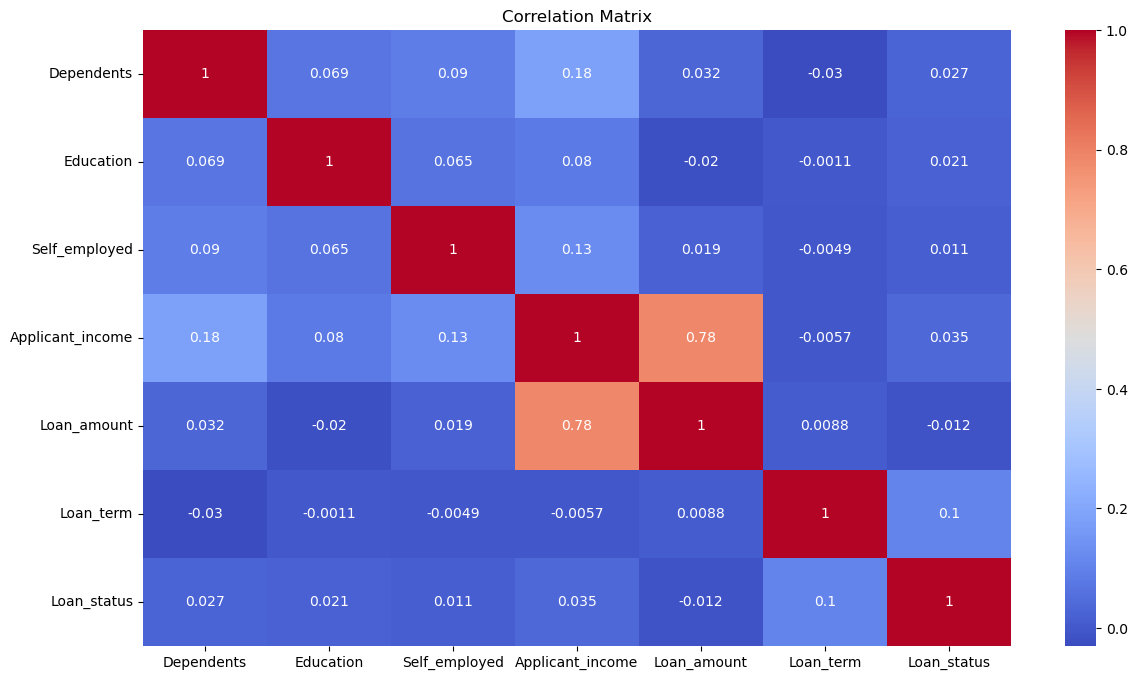

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA on preprocessed data
plt.figure(figsize=(14, 8))

# Correlation matrix shows the pairwise correlation of all columns in the dataset
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Displaying the correlation matrix
plt.show()






There is a strong correlation of 0.78 between loan amount and the applicant income.

Loan_status
0    3078
1    1805
Name: count, dtype: int64

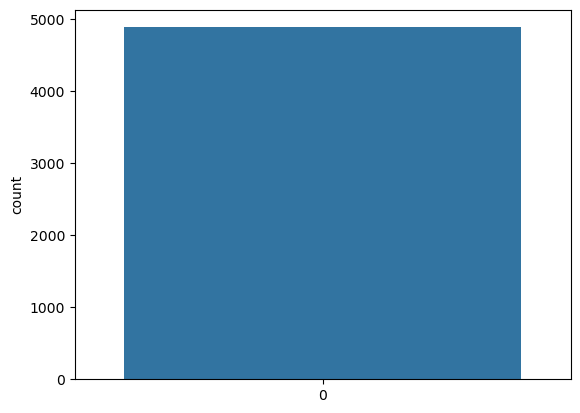

In [33]:
sns.countplot(data['Loan_status'])
#counting the occurrences of each unique value in loan status column
data['Loan_status'].value_counts()

Resampling since there is class imbalance in the loan status column

In [34]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['Loan_status']==0)] 
df_minority = data[(data['Loan_status']==1)] 
# upsample minority class
df_minority_resampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 3078, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
data_resampled = pd.concat([df_minority_resampled, df_majority])

In [35]:
#this was the previous code with minor error in it , which is why the previous accuracy was 61 to 64%
# from sklearn.utils import resample
# #create two different dataframe of majority and minority class 
# df_majority = data[(data['Loan_status']==1)] 
# df_minority = data[(data['Loan_status']==0)] 
# # upsample minority class
# df_minority_resampled = resample(df_minority, 
#                                  replace=True,    # sample with replacement
#                                  n_samples= 1805, # to match majority class
#                                  random_state=0)  # reproducible results
# # Combine majority class with upsampled minority class
# data_resampled = pd.concat([df_minority_resampled, df_majority])

<Axes: xlabel='Loan_status', ylabel='count'>

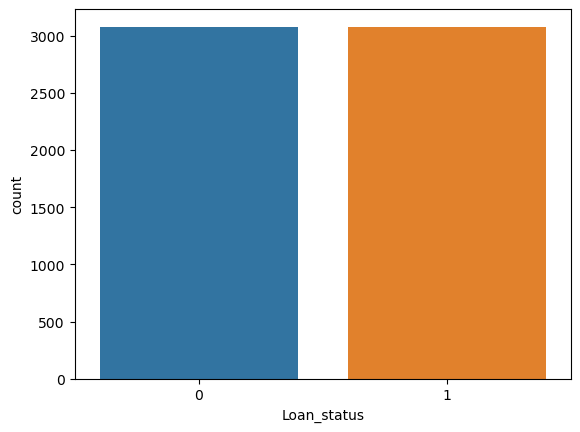

In [36]:

loan_status=data_resampled['Loan_status'].value_counts()
sns.countplot(x='Loan_status',data=data_resampled)

In [37]:
data_resampled.shape

(6156, 7)

# Split the dataset for training and testing

In [38]:
X = data_resampled.drop("Loan_status", axis=1)
y = data_resampled["Loan_status"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Model Training

In [39]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the test:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy of the test: 0.7508116883116883
              precision    recall  f1-score   support

           0       0.79      0.65      0.72       594
           1       0.72      0.84      0.78       638

    accuracy                           0.75      1232
   macro avg       0.76      0.75      0.75      1232
weighted avg       0.76      0.75      0.75      1232



In [41]:
export_graphviz(tree_clf, out_file='decision_tree.dot', feature_names=X.columns)
Source.from_file('decision_tree.dot').view()

'decision_tree.dot.pdf'

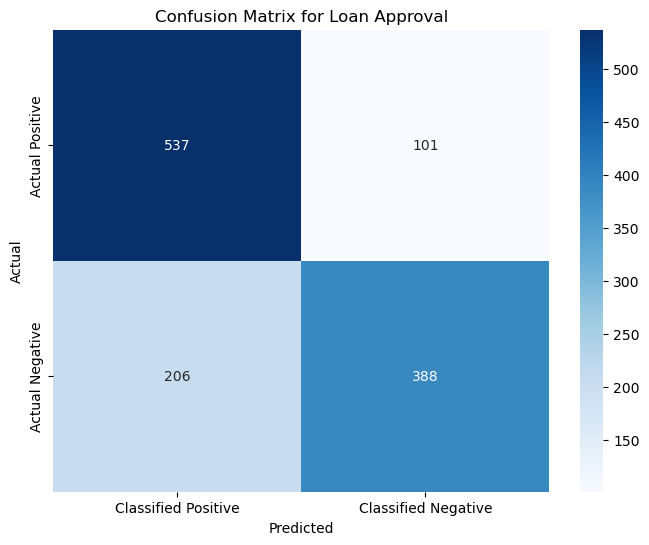

In [42]:
cm = confusion_matrix(y_test, y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
new_cm = np.array([[TP, FN],
                    [FP, TN]])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Classified Positive', 'Classified Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Loan Approval')
plt.show()

In [43]:

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(f"True Positive: {TP},\nFalse Positive: {FP},\nTrue Negative: {TN},\nFalse Negative: {FN}\n  ")


True Positive: 537,
False Positive: 206,
True Negative: 388,
False Negative: 101
  



Using GridSearch to improve the model

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'random_state':[0, 1, 2, 3, 4, 5, 10],
                 'criterion':['gini','entropy'],
                  'class_weight': ['balanced']
                 }
grid_search = GridSearchCV(tree_clf, param_grid, cv=10,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)
print("params: ",grid_search.best_params_)

params:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'random_state': 3}


In [45]:
tree_clf_gini = DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_depth=10,max_features=4,random_state=3)
tree_clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=4,
                       random_state=3)

In [46]:
y_pred_gini = tree_clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy of the test after grid search:", accuracy_gini)

print(classification_report(y_test, y_pred_gini))


Accuracy of the test after grid search: 0.6160714285714286
              precision    recall  f1-score   support

           0       0.64      0.46      0.53       594
           1       0.60      0.76      0.67       638

    accuracy                           0.62      1232
   macro avg       0.62      0.61      0.60      1232
weighted avg       0.62      0.62      0.61      1232



In [47]:
export_graphviz(tree_clf_gini, out_file='decision_tree_gini.dot', feature_names=X.columns)
Source.from_file('decision_tree_gini.dot').view()

'decision_tree_gini.dot.pdf'

confusion matrix

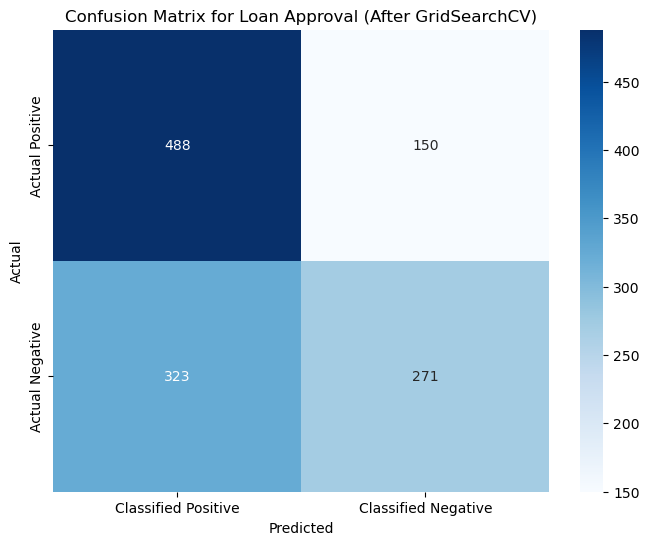

In [48]:
# Creating a new confusion matrix in the desired format
cm = confusion_matrix(y_test, y_pred_gini)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
new_cm = np.array([[TP, FN],
                    [FP, TN]])

# Plotting the new confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Classified Positive', 'Classified Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Loan Approval (After GridSearchCV)')
plt.show()

In [49]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(f"True Positive: {TP},\nFalse Positive: {FP},\nTrue Negative: {TN},\nFalse Negative: {FN}\n  ")


True Positive: 488,
False Positive: 323,
True Negative: 271,
False Negative: 150
  


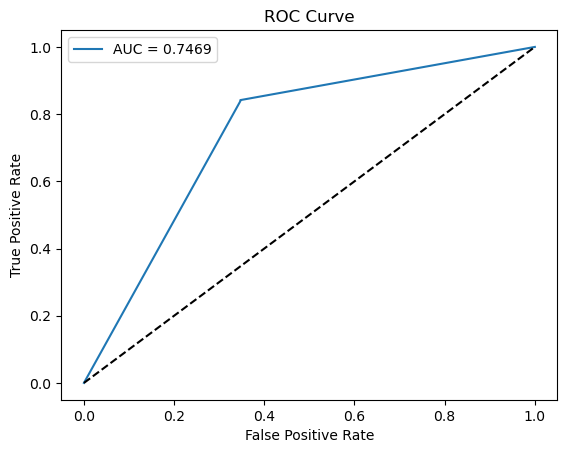

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

#To display the ROC curve
y_pred_proba = tree_clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, drop_intermediate=False)

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



The accuracy of the model is 75%, and the AUC score is 0.75. After gridSearch there is a slight decrease in the accuracy of the model.

(There was small error in the resampling code , which was discovered after the ppt presentation , due to which the previous accuracy was ranging from 61 - 64%, afte the code correction the model performed consistent with accuracy of 75%)